## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data = pd.read_csv('HR Employee Attrition.csv')

In [3]:
# Top 5 rows of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Dimensions of dataset
data.shape

(1470, 35)

In [6]:
# Column names
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Datatypes of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are various categorical columns present in the dataset and we need to convert them into numerical data in the further process.

In [8]:
# Checking missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see, there are no missing values in the dataset.

In [9]:
# Statistical summary of dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploratory Data Analysis (EDA)

### (i) Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


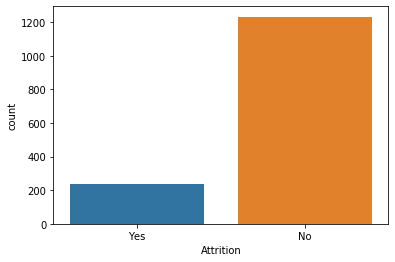

In [10]:
# Checking the No.of Attritions (Yes/No) in the dataset using value_sounts
print(data['Attrition'].value_counts())
sns.countplot(x='Attrition', data=data)
plt.show()

There are 237 records of employees having attrition and 1233 of employees are not having attrition.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


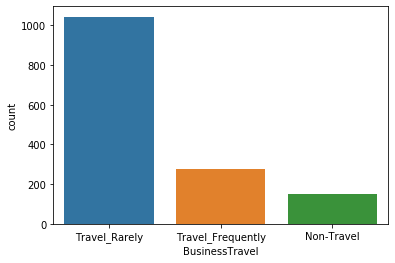

In [11]:
# Checking out BusinessTravel Observation
print(data['BusinessTravel'].value_counts())
sns.countplot(x='BusinessTravel', data=data)
plt.show()

There are 1043 employees who do Travel rarely, 277 employees who Travel frequently and 150 employees who do not travel to business trips.

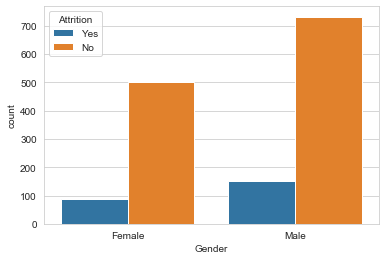

In [13]:
# Check the attrition based on gender
sns.set_style('whitegrid')
sns.countplot(x='Gender', data=data, hue='Attrition')
plt.show()

we can see that male employees have higher attrition rate compared to female employees.

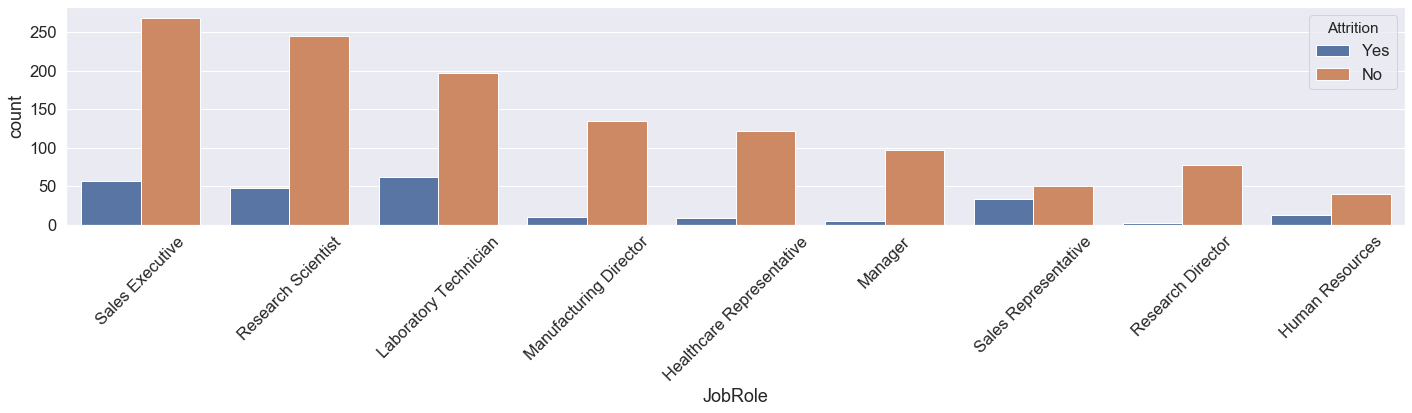

In [16]:
# Check the attrition according to jobrole
plt.figure(figsize=(24, 4))
sns.set(font_scale=1.5)
sns.countplot(x='JobRole', data=data, hue='Attrition')
plt.xticks(rotation=45)
plt.show()

From the above graph, we can observe the more Sales Executive does not have attrition and less Human Resource people does not have attrition.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


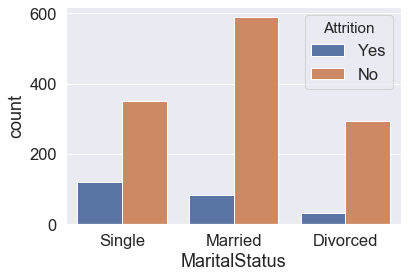

In [18]:
# Check attrition according to MaritalStatus
print(data['MaritalStatus'].value_counts())
sns.countplot(x='MaritalStatus', data=data, hue='Attrition')
plt.show()

Single employees have more attrition whereas divorced employees have less attritions.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


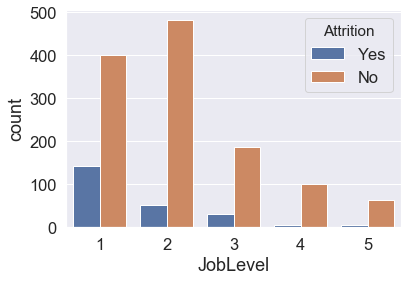

In [19]:
# Check attrition according to JobLevel
print(data['JobLevel'].value_counts())
sns.countplot(x='JobLevel', data=data, hue='Attrition')
plt.show()

Lower Job level, higher chance of attrition.

No     1054
Yes     416
Name: OverTime, dtype: int64


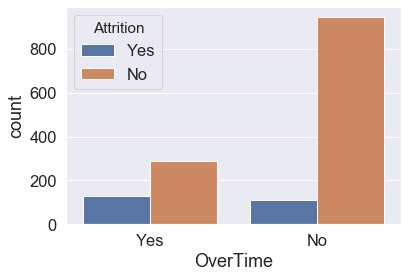

In [20]:
# Check attrition according to OverTime
print(data['OverTime'].value_counts())
sns.countplot(x='OverTime', data=data, hue='Attrition')
plt.show()

Very few people who doing overtime have a less chance of attrition

### (ii) Bivariate Analysis

Text(0, 0.5, 'DailyRate')

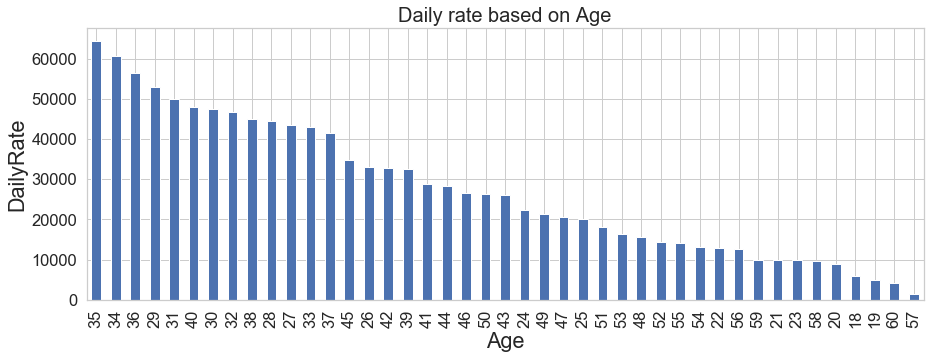

In [22]:
# Check the ratio of daily rate based on different Age
plt.figure(figsize=(20, 8))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Daily rate based on Age',{'fontsize':20})
data.groupby('Age')['DailyRate'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.xlabel('Age',{'fontsize':'large'})
plt.ylabel('DailyRate', {'fontsize':'large'})

We can see that employees between age 29-40 are getting highest daily rate and we can observe from above graph the employees aged 35 are getting highest daily rate among all.

Department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64




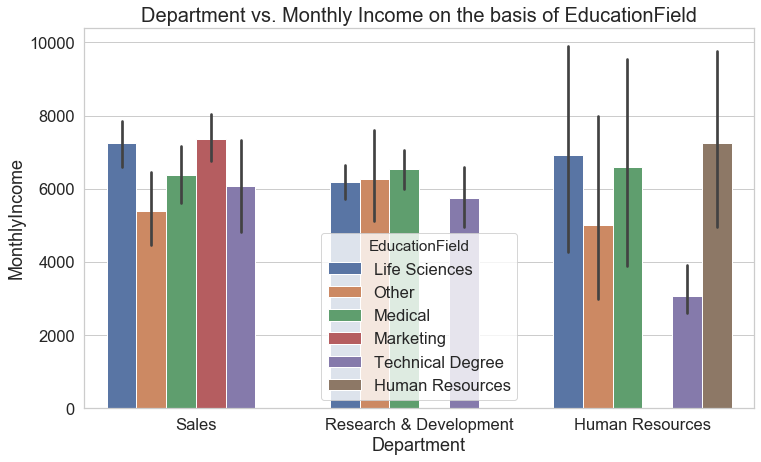

In [24]:
# Check Department vs. Monthly Income, on the basis of Education Field.
plt.figure(figsize=(12, 7))
print('Department\n')
print(data['Department'].value_counts())
print('\n')
print('EducationField\n')
print(data['EducationField'].value_counts())
plt.title('Department vs. Monthly Income on the basis of EducationField', {'fontsize':20})
print('\n')
sns.barplot(x='Department', y='MonthlyIncome', data=data, hue='EducationField')
plt.show()


Observations:
    
* In Sales department, employees belonging to Life Sciences and Marketing field get more salary.

* In Research & Development department, employees belonging to Medical field get more salary.

* In Human Resources department, employees belonging to human resources fiels get more salary.

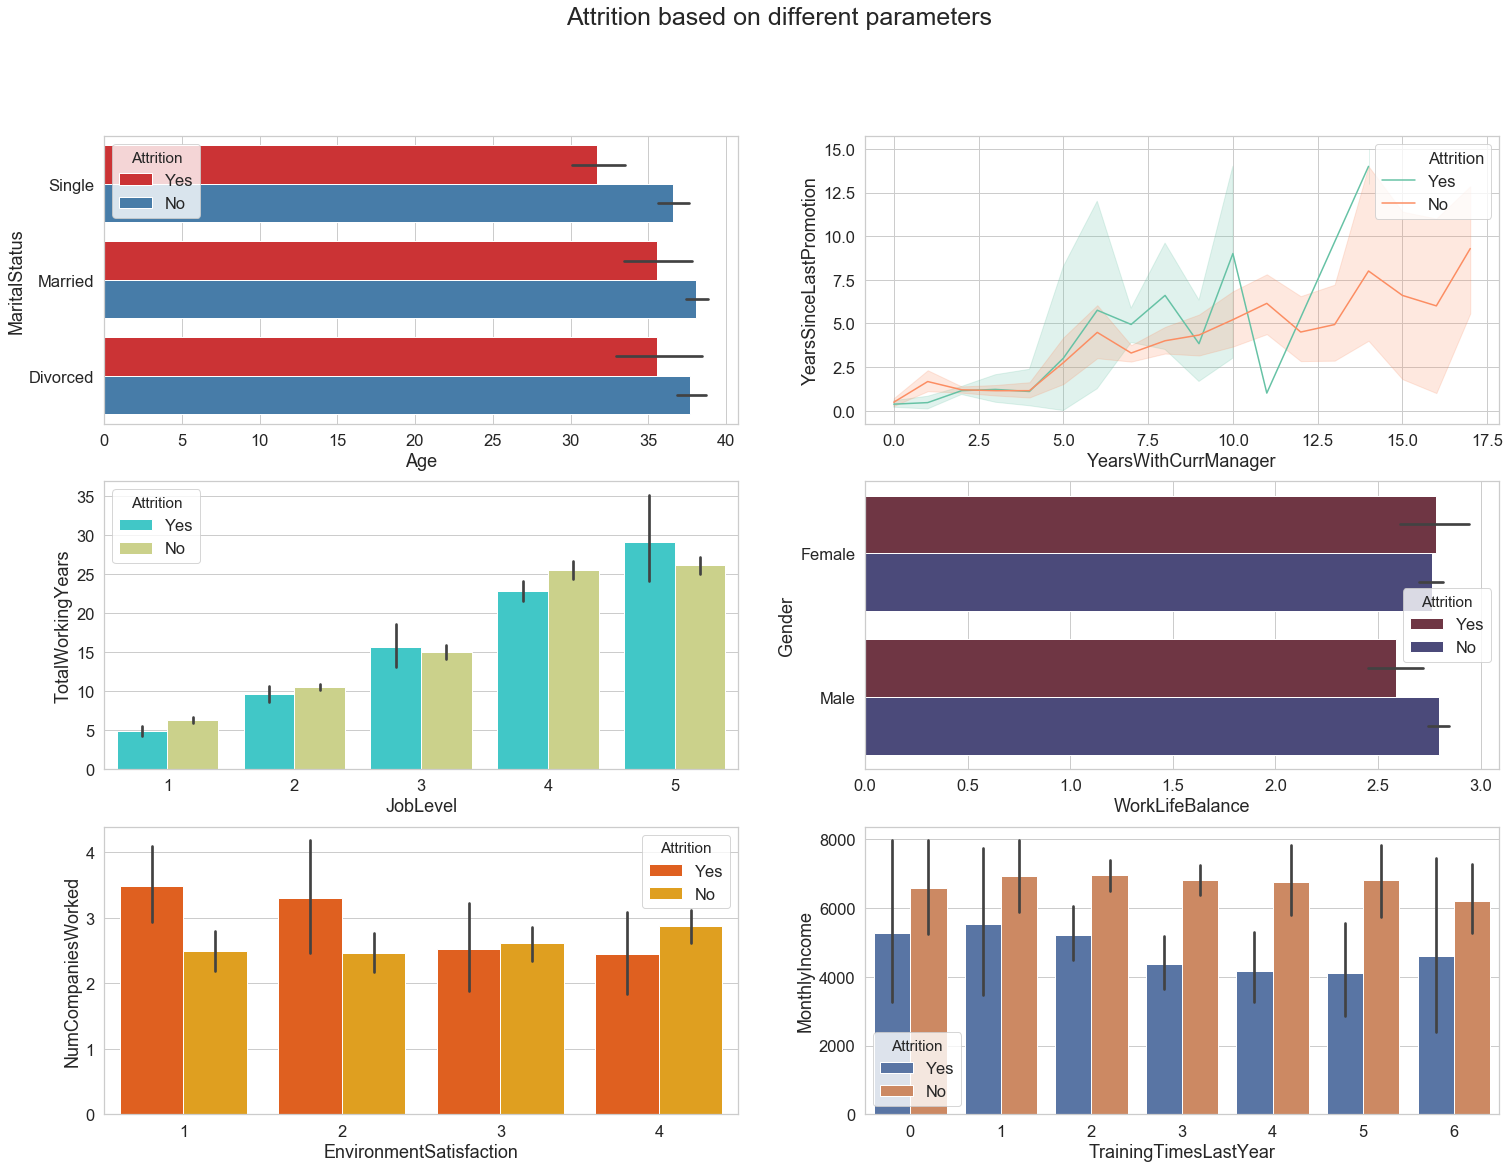

In [29]:
# Plotting Attrition on different data parameters as it is the target variable.
fig, axes = plt.subplots(3, 2, figsize=(25, 18))

fig.suptitle('Attrition based on different parameters', fontsize=25)
sns.set_style('whitegrid')

# Plotting Age vs. MaritalStatus relationship on the basis of Attrition using bar plot
sns.barplot(ax=axes[0,0], x='Age', y='MaritalStatus', hue='Attrition', data=data, palette="Set1")

# Plotting YearWithCurrManager vs. YearSinceLastPromotion relationship on the basis of Attrition using line plot
sns.lineplot(ax=axes[0,1], x='YearsWithCurrManager', y='YearsSinceLastPromotion', hue='Attrition', data=data, palette="Set2")

# Plotting JobLevel vs. TotalWorkingYears relationship on the basis of Attrition using bar plot
sns.barplot(ax=axes[1,0], x='JobLevel', y='TotalWorkingYears', hue='Attrition', data=data, palette="rainbow")

# Plotting WorkLifeBalance vs. Gender relationship on the basis of Attrition using bar plot
sns.barplot(ax=axes[1,1], x='WorkLifeBalance', y='Gender', hue='Attrition', data=data, palette="icefire_r")

# Plotting EnvironmentSatisfaction vs. NumCompaniesWorked relationship on the basis of Attrition using bar plot
sns.barplot(ax=axes[2,0], x='EnvironmentSatisfaction', y='NumCompaniesWorked', hue='Attrition', data=data, palette="autumn")

# Plotting TrainingTimesLastYear vs. MonthlyIncome relationship on the basis of Attrition using bar plot
sns.barplot(ax=axes[2,1], x='TrainingTimesLastYear', y='MonthlyIncome', hue='Attrition', data=data)

Observations:
    
(1). We can observe for both Married and Divorced status employees, based on their Age, the Attrition rate is high.

(2). As Working with Current Manager and the gap in since Last Promotion at the working year with manager is increasing, we can also notice the increase in Attrition rate.

(3). We can see that the Working Years and Job Level increases as the Attrition rate increases.

(4). If we observe the WorkLife Balance on the basis of Gender, Female employees are having more Attrition rate than Male.

(5). Envirnment Satisfaction is also playing a role for Attrition rate because we can observe that if Environment Satisfaction is more for certain employees, there are more Attritions present. If it is less, then there is no Attrition rate.

(6). Based on TrainingTimesLastYear vs. MonthlyIncome, the less Attrition rate goes high as income increases. For more trainings, the income increases and decreases sometimes.

### (iii) Multivariate Analysis

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Observations:
    
(1). There is not much difference between mean and median of the data.

(2). The value of standard deviation is high for columns like EmployeeNumber, DailyRate etc.

(3). The difference between 75th percentile and maximum value is large for most columns and from this we can assume that there are outliers present.

In [31]:
# Correlation of the dataset
corr = data.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


As there is no correlation between EmployeeCount and StandardHours, we can drop the columns, it is not helping to analyse the data.

In [32]:
# Drop the columns (EmployeeCount and StandardHours)
data.drop(columns=['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [35]:
# Checking Dataset shape after droping the columns.
data.shape

(1470, 33)

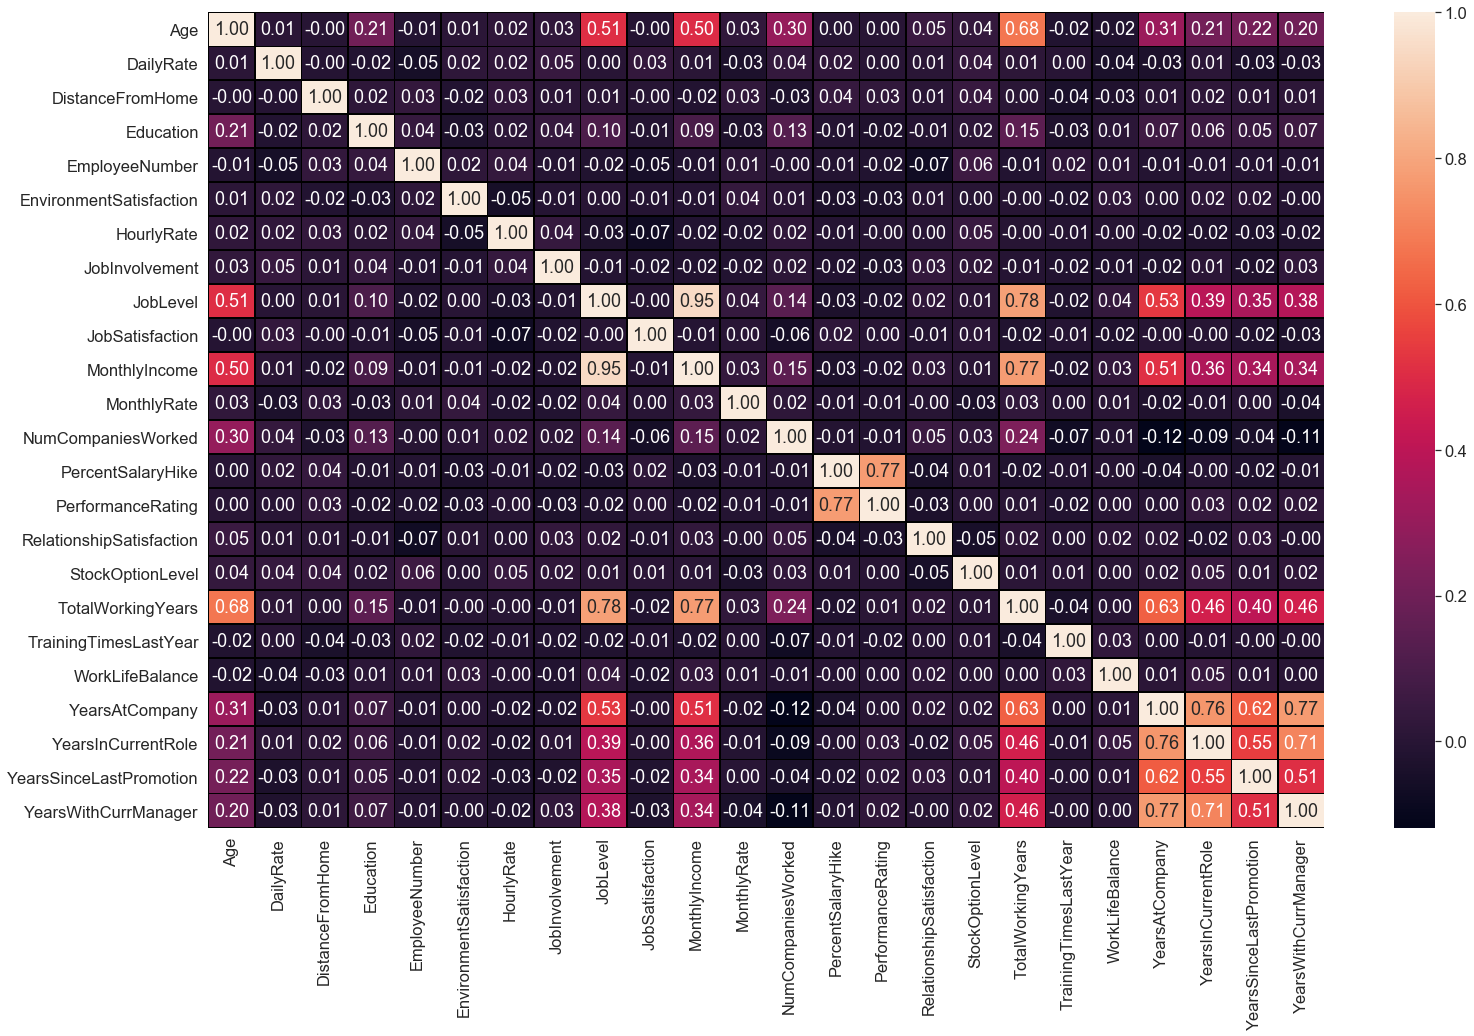

In [36]:
# plotting heatmap to understand the visualization of correlation
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=0.5, ax=ax, linecolor="black")
plt.show()

Observations:
    
(1). JobLevel and MonthlyIncome has the highest positive correlation between each other at a value of 95%.

(2). Most of the columns are negatively correlated with each other and the values are very less too.

(3). PerformanceRating is highly related to PercentSalaryHike.

(4). YearsWithCurrManager is highly related to YearsAtCompany.

(5). Positively correlated columns have high impact with the target variable, whereas negatively correlated columns have less or zero impact with the target variable.


## Convert Categorical data into Numerical data

In [69]:
# Checking the categorical columns
cat_cols=data.select_dtypes(include='object')
cat_cols.columns

Index([], dtype='object')

In [70]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

#Taking the categorical columns to convert Numerical columns.
cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in cols:
    data[i] = Le.fit_transform(data[i])

In [71]:
# Checking the datatypes after conversion
data.dtypes

Age                           int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome            float64
Education                     int64
EducationField                int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                        int64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       

Now, all columns are in numerical form.

## Checking skewness

In [72]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
T

Most of the columns data are not normally distributed and they are skewed.

## Splitting x and y

In [73]:
# Independent Variable
df_x = data.drop('Attrition', axis=1)

# Dependent Variable
y = data['Attrition']

In [74]:
# Checkind x data
df_x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,1,2,0,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,2,3,1,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,4,1,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,5,4,0,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,7,1,1,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612


In [75]:
# Checking y data after splitting
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Treating skewness using log-transform

In [78]:
# Removing skewness from independent variables by using log transform
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])

Observation:
    
(1). While handling outliers in this dataset, we can see that if we try to remove them the entire dataset is removed. This means that the dataset depends on outliers and iy is being needed in order to predict the attrition rate.

(2). The entire EDA process is completed and we can further proceed with model building.

## Standard Scaler

In [79]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =sc.fit_transform(df_x)
x 

array([[ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.29061127,
        -1.09181992,  0.54799589],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.88267046,
         0.10012719,  0.90492352],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.73678265,
        -1.09181992, -1.67504313],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.352871  ,
        -1.09181992,  0.04493464],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.71446221,
        -1.09181992,  1.05105714],
       [-0.32016256,  0.59004834, -0.43256792, ...,  0.00951942,
         0.10012719, -0.311993  ]])

We can see the data has been scaled.

In [97]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [98]:
#Finding the best random state and accuracy
for i in range (0, 1000):
    x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=i)
    LR.fit(x_train, y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,2)==round(accuracy_score(y_test, pred_test)*100,2):
        print('At random state',i,'the model perform well')
        print('Training accuracy_score is: ', accuracy_score(y_train, pred_train)*100)
        print('Testing accuracy_score is: ', accuracy_score(y_test, pred_test)*100)

At random state 205 the model perform well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 290 the model perform well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 374 the model perform well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 379 the model perform well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 427 the model perform well
Training accuracy_score is:  88.09523809523809
Testing accuracy_score is:  88.09523809523809
At random state 460 the model perform well
Training accuracy_score is:  87.75510204081633
Testing accuracy_score is:  87.75510204081633
At random state 470 the model perform well
Training accuracy_score is:  87.41496598639455
Testing accuracy_score is:  87.41496598639455
At random state 527 the model perform well
Train

In [99]:
# Creating train test spli using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=998)

## Finding out the Best Model

In [100]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Initializinf the instance of the model
LR = LogisticRegression()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [102]:
models = []
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [103]:
#Importing required modules
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

---------------------------- LogisticRegression ------------------------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy_score:  0.8843537414965986


cross_val_score:  0.8775510204081632


roc_auc_score:  0.6746031746031746


Classification report: 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       252
           1       0.67      0.38      0.48        42

    accuracy                           0.88       294
   macro avg       0.79      0.67      0.71       294
weighted avg       0.87      0.88      0.87       294

Confusion matrix: 

[[244   8]
 [ 26  16]]


AUC_ROC Curve:



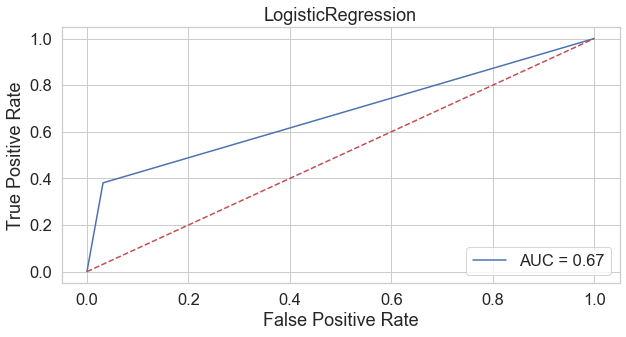





---------------------------- GaussianNB ------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy_score:  0.7891156462585034


cross_val_score:  0.8163265306122449


roc_auc_score:  0.6884920634920635


Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       252
           1       0.35      0.55      0.43        42

    accuracy                           0.79       294
   macro avg       0.63      0.69      0.65       294
weighted avg       0.84      0.79      0.81       294

Confusion matrix: 

[[209  43]
 [ 19  23]]


AUC_ROC Curve:



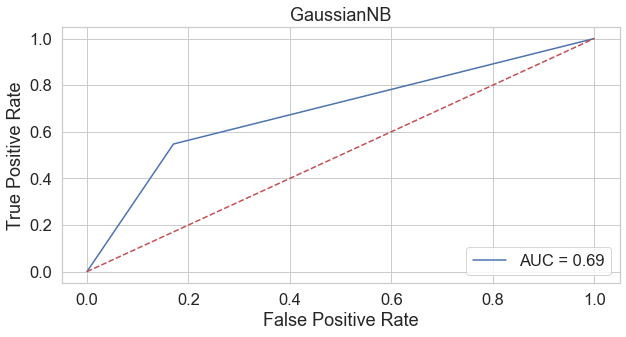





---------------------------- DecisionTreeClassifier ------------------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


accuracy_score:  0.8095238095238095


cross_val_score:  0.7727891156462585


roc_auc_score:  0.621031746031746


Classification report: 

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       252
           1       0.34      0.36      0.35        42

    accuracy                           0.81       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.81      0.81      0.81       294

Confusion matrix:

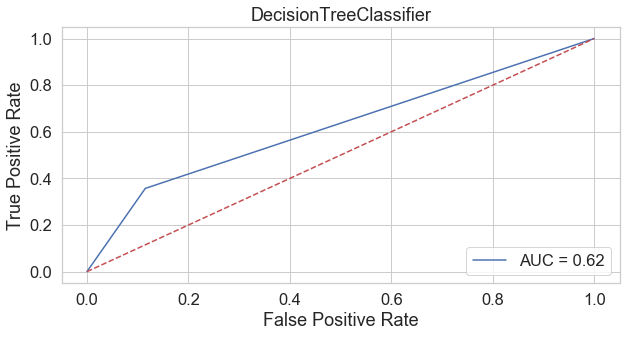





---------------------------- KNeighborsClassifier ------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy_score:  0.8503401360544217


cross_val_score:  0.8489795918367348


roc_auc_score:  0.5555555555555556


Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       252
           1       0.43      0.14      0.21        42

    accuracy                           0.85       294
   macro avg       0.65      0.56      0.57       294
weighted avg       0.81      0.85      0.82       294

Confusion matrix: 

[[244   8]
 [ 36   6]]


AUC_ROC Curve:



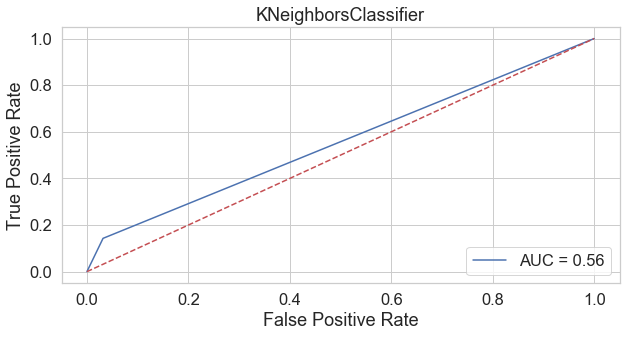

In [105]:
Model = []
Score = []
CV_Score = []
ROC_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, pre)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score: ', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')
    
    plt.figure(figsize=(10, 50))
    plt.subplot(912)
    print('AUC_ROC Curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    

In [106]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score, 'ROC AUC Score':ROC_Score})
Result

,Model,Accuracy Score,CV Score,ROC AUC Score
0,LogisticRegression,88.435374,87.755102,67.460317
1,GaussianNB,78.911565,81.632653,68.849206
2,DecisionTreeClassifier,80.952381,77.278912,62.103175
3,KNeighborsClassifier,85.034014,84.897959,55.555556


From the above algorithms, we can say that the Logistic Regression is working well by giving an accuracy of 88.43% and cross validation score of 87.75. Now we will perform Hyperparameter Tuning to find the best parameters and improve the accuracy of the model.

## Hyperparameter Tuning

In [107]:
# Creating parameter list to pass GridSearchCV
parameters = {'max_iter':[50, 100, 150, 200, 400, 500, 1000], 'penalty':['l1','l2','elasticnet'],
             'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001], 'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [109]:
# Using GridSearchCV to run the parameters and checking the accuracy
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
grid=GridSearchCV(LR, parameters,cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8800593944661742


In [111]:
# Obtaining the final accuracy using the best parameters above
LR=LogisticRegression(C=0.1, max_iter=50, penalty='l2', solver='newton-cg')
LR.fit(x_train, y_train)
pred=LR.predict(x_test)
print('Final Accuracy after tuning: ', accuracy_score(y_test, pred)*100)
print('Cross Validation Score: ', cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()*100)

Final Accuracy after tuning:  88.43537414965986
Cross Validation Score:  87.68707482993196


## Finalizing the model

In [112]:
LR_predicition=LR.predict(x)
print('Predictions of Logistic Regression: ', LR_predicition)

Predictions of Logistic Regression:  [1 0 1 ... 0 0 0]


In [119]:
# Saving the model
from sklearn.externals import joblib
joblib.dump(LR, 'HR_Analytics_Project.pkl')

['HR_Analytics_Project.pkl']